In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('data/europe.csv')
countries = df.values[:, 0]
countries


array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom'], dtype=object)

In [2]:
scaled_data = np.zeros((len(df.values), len(df.values[0]) - 1))
for i in range(1, len(df.values[0])):
    aux = StandardScaler().fit_transform(df.values[:, i].reshape(-1, 1))
    scaled_data[:, i - 1] = aux[:, 0]
pca = PCA(n_components=7)
transform = pca.fit_transform(scaled_data)
components = pca.components_.T
correlation = np.corrcoef(scaled_data.T)

In [3]:
output_file = open('components.csv', 'w')

head = 'Features'
for i in range(7):
    head += f',PC{i}'
head += "\n"
output_file.write(head)

for i in range(len(components)):
    line = df.columns.values[i + 1]
    for j in components[i]:
        line += f',{j}'
    line += "\n"
    output_file.write(line)
output_file.close()

          Country    Area    GDP  Inflation  Life.expect  Military  \
0         Austria   83871  41600        3.5        79.91      0.80   
1         Belgium   30528  37800        3.5        79.65      1.30   
2        Bulgaria  110879  13800        4.2        73.84      2.60   
3         Croatia   56594  18000        2.3        75.99      2.39   
4  Czech Republic   78867  27100        1.9        77.38      1.15   

   Pop.growth  Unemployment  
0        0.03           4.2  
1        0.06           7.2  
2       -0.80           9.6  
3       -0.09          17.7  
4       -0.13           8.5  
                Area           GDP  Inflation  Life.expect   Military  \
count      28.000000     28.000000  28.000000    28.000000  28.000000   
mean   166422.535714  31860.714286   3.342857    78.122500   1.606071   
std    165538.675951  14502.115792   1.398260     3.189156   0.801352   
min      2586.000000   7200.000000   0.200000    68.740000   0.000000   
25%     48083.250000  20350.000000

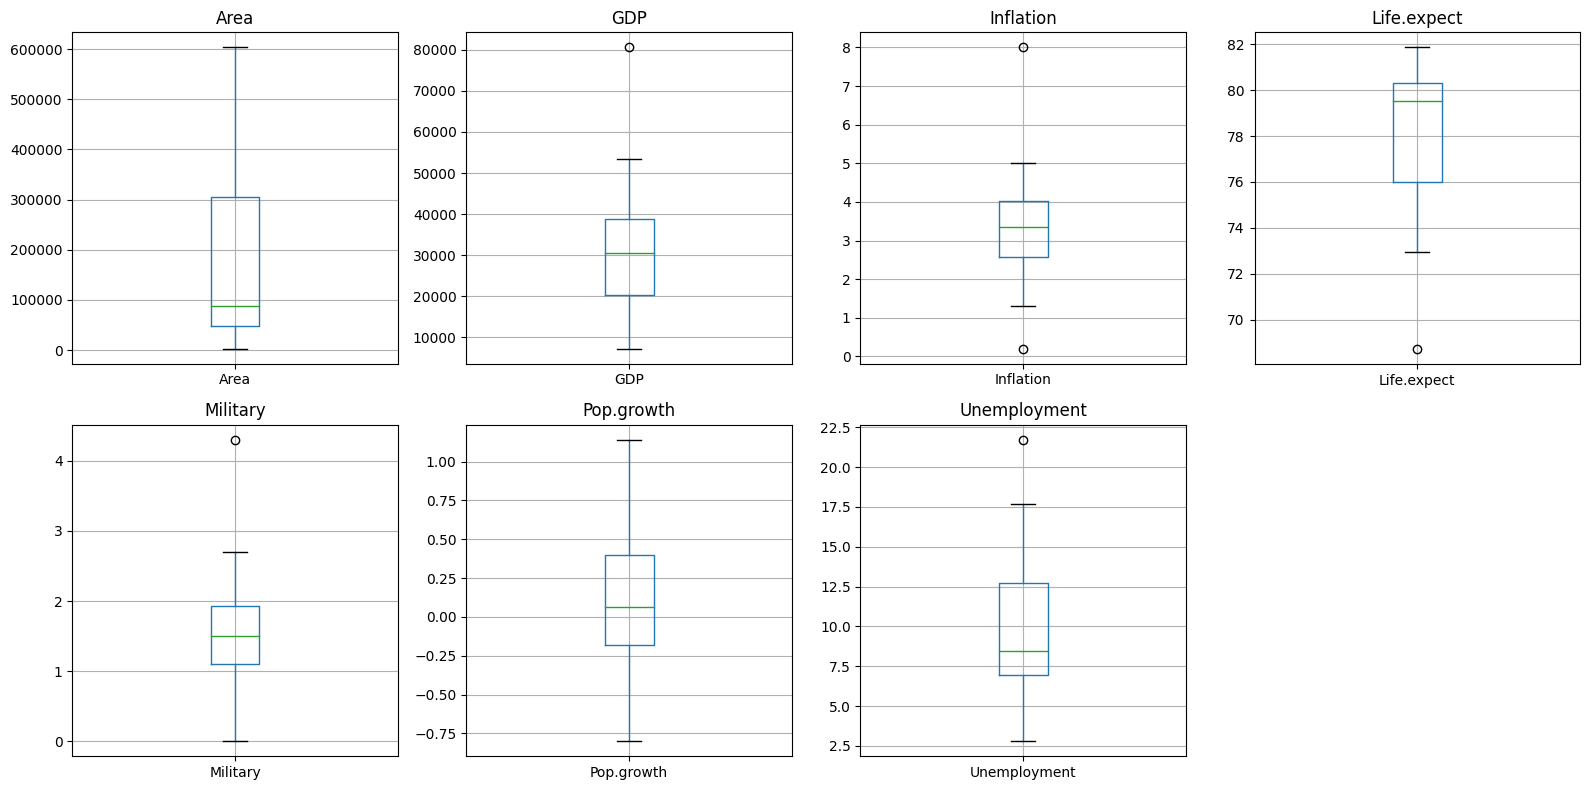

In [4]:
print(df.head())
print(df.describe())

plt.figure(figsize=(16, 8))

for i, col in enumerate(df.columns[1:]):
    plt.subplot(2, 4, i+1)  
    df.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()

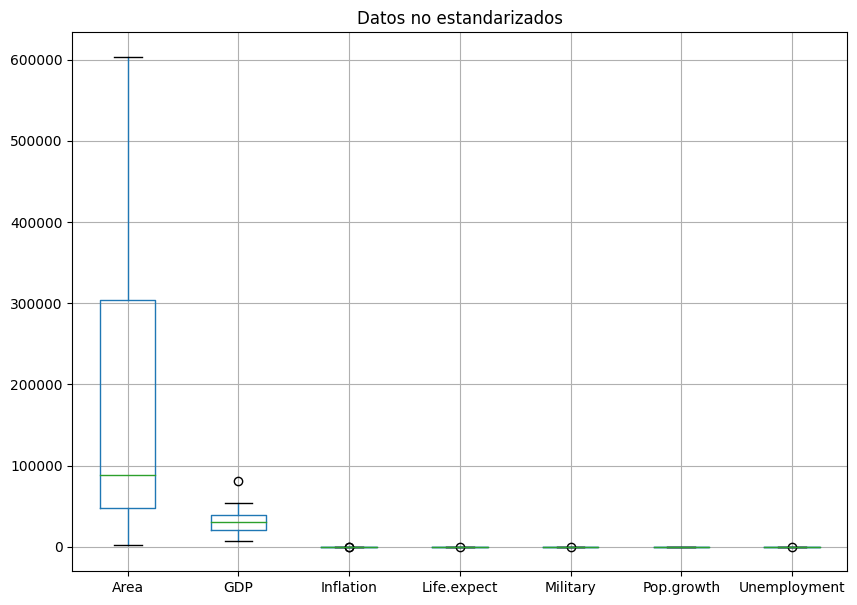

In [5]:
plt.figure(figsize=(10, 7))
df.boxplot()
plt.title('Datos no estandarizados')
plt.show()

       Area       GDP  Inflation  Life.expect  Military  Pop.growth  \
0 -0.507835  0.683900   0.114447     0.570778 -1.024347   -0.176789   
1 -0.835987  0.417061   0.114447     0.487756 -0.388952   -0.115927   
2 -0.341689 -1.268238   0.624255    -1.367473  1.263074   -1.860631   
3 -0.675636 -0.973310  -0.759511    -0.680942  0.996208   -0.420236   
4 -0.538618 -0.334301  -1.050830    -0.237093 -0.579571   -0.501385   

   Unemployment  
0     -1.245527  
1     -0.592442  
2     -0.069973  
3      1.693357  
4     -0.309438  


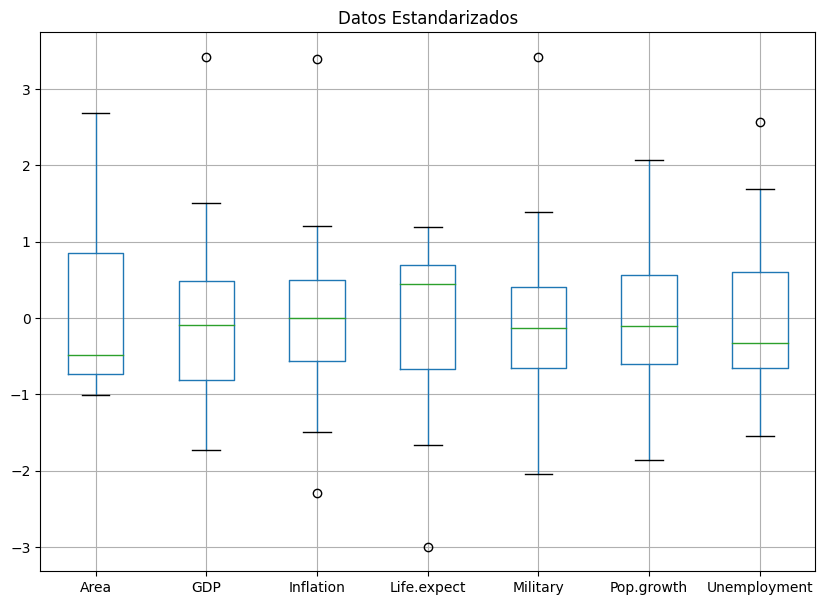

In [6]:
scaler = StandardScaler()
df_standardized = df
df_standardized = df_standardized.drop(columns=["Country"])
df_standardized = pd.DataFrame(scaler.fit_transform(df_standardized), columns=df_standardized.columns)
print(df_standardized.head())

plt.figure(figsize=(10, 7))
df_standardized.boxplot()
plt.title('Datos Estandarizados')
plt.show()

Varianza explicada por cada componente: [0.46102367 0.16958906 0.15188436 0.11005085 0.06540695 0.02409627]


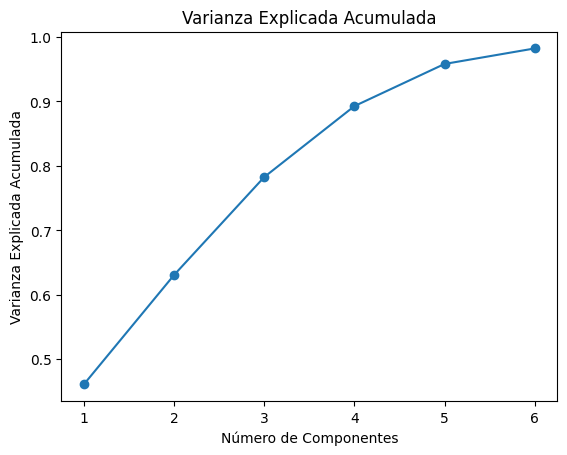

In [11]:
X = df.iloc[:, 1:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el PCA
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, 7), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada')
plt.show()


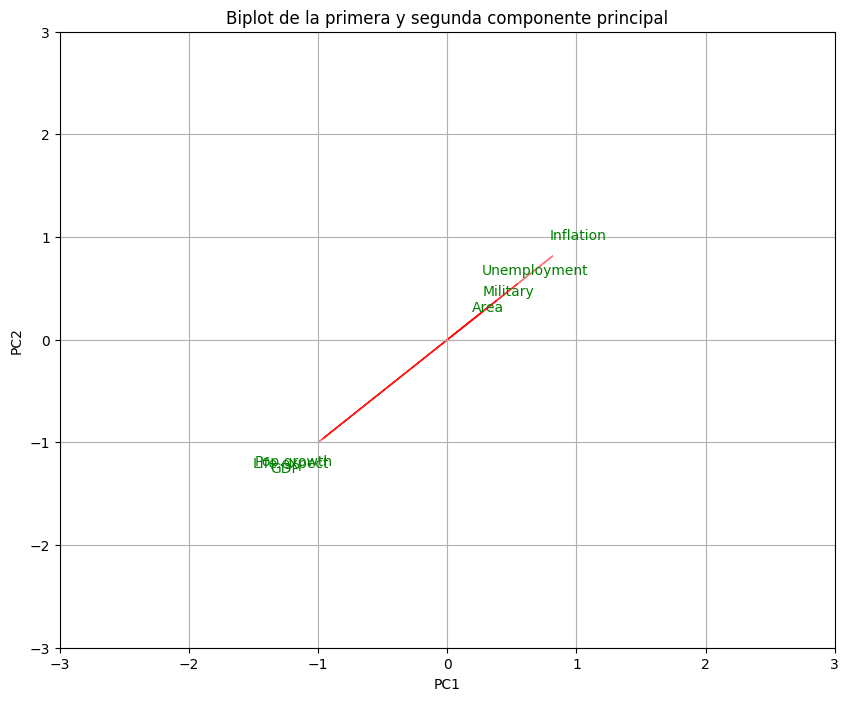

In [12]:
loadings = pca.components_[0, :]

plt.figure(figsize=(10, 8))

for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i]*2, loadings[i]*2, color='r', alpha=0.5)
    plt.text(loadings[i]*2.5, loadings[i]*2.5, var, color='g', ha='center', va='center', fontsize=10)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot de la primera y segunda componente principal')
plt.grid()
plt.show()


### Otro intento de biplot

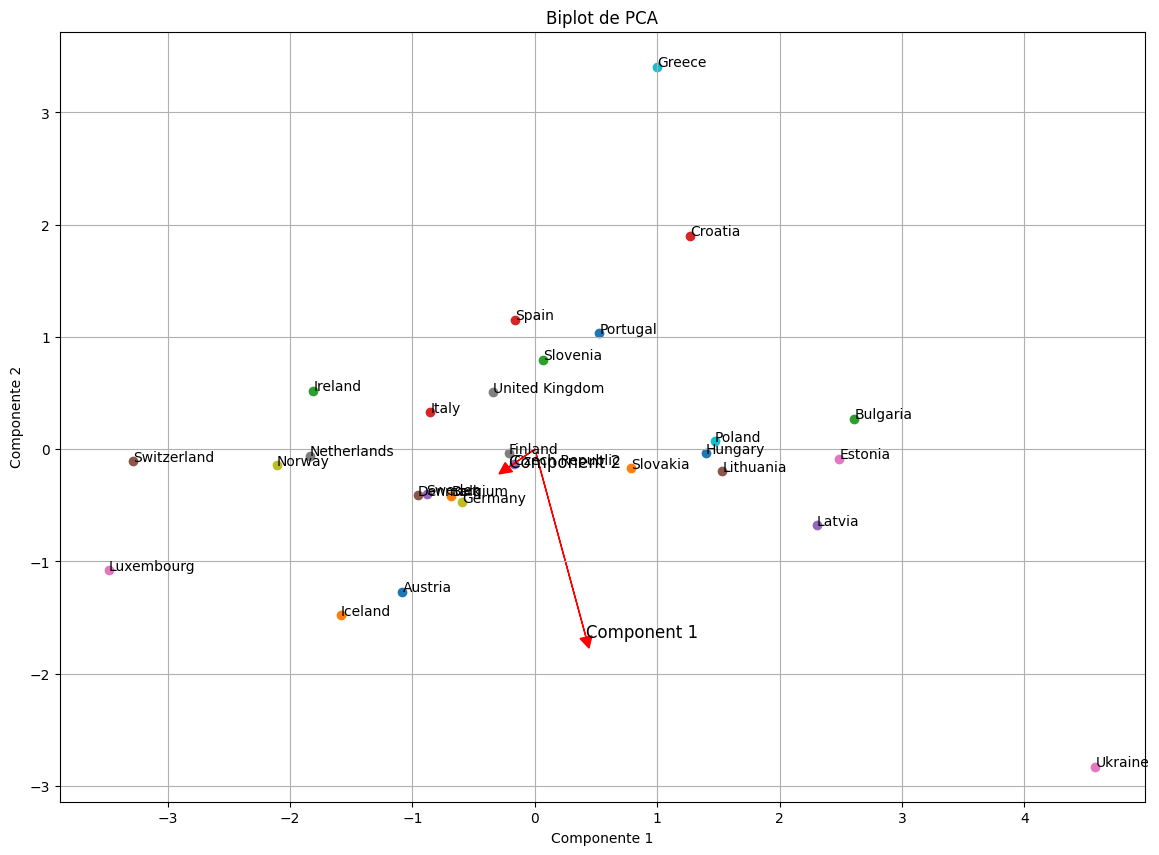

In [13]:
# Leemos los datos
data = pd.read_csv("data/europe.csv")

# Extraer los nombres de los países y almacenarlos en una variable
countries = data["Country"]
data = data.drop(columns=["Country"])  # Eliminar la columna de nombres de los países

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ajustar un modelo de PCA con dos componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los resultados del PCA
principal_df = pd.DataFrame(data=principal_components, columns=["Componente 1", "Componente 2"])

# Crear el gráfico de biplot con los nombres de los países
fig, ax = plt.subplots(figsize=(14, 10))  # Aumentar el tamaño del gráfico

for i, country in enumerate(countries):
    x = principal_df.loc[i, "Componente 1"]
    y = principal_df.loc[i, "Componente 2"]
    ax.scatter(x, y)
    ax.annotate(country, (x, y))

# Graficar los vectores de las componentes
for i, (component, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    ax.arrow(0, 0, component[0] * var, component[1] * var, head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(component[0] * var, component[1] * var, f'Component {i + 1}', fontsize=12)

# Configurar el gráfico
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Biplot de PCA")

plt.grid()
plt.show()

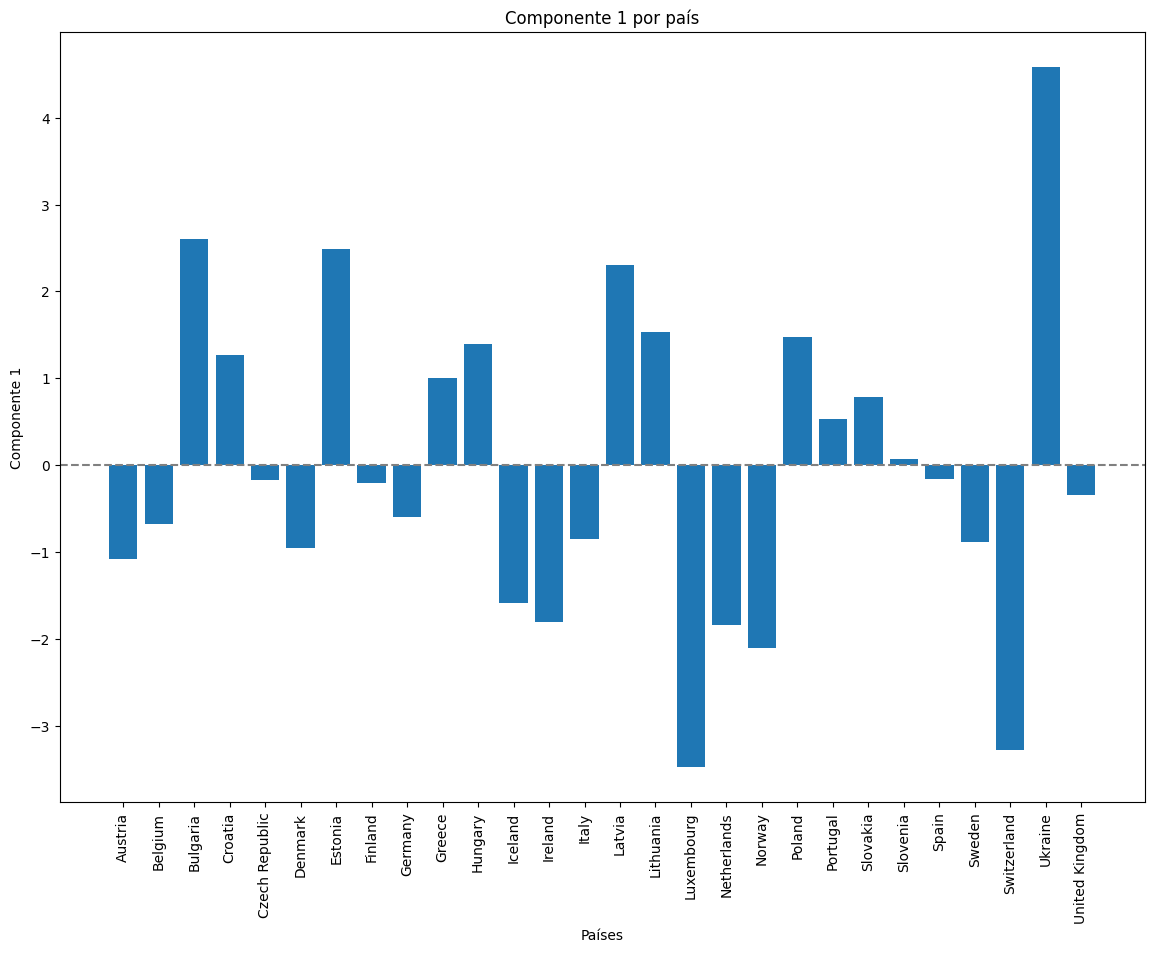

In [25]:
# Leemos los datos
data = pd.read_csv("data/europe.csv")

# Extraer los nombres de los países y almacenarlos en una variable
countries = data["Country"]
data = data.drop(columns=["Country"])  # Eliminar la columna de nombres de los países

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=1)
principal_components = pca.fit_transform(data_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=["Componente 1"])

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(countries, principal_df["Componente 1"])

ax.axhline(y=0, color='gray', linestyle='--')
ax.set_ylabel("Componente 1")
ax.set_xlabel("Países")
ax.set_title("Componente 1 por país")

plt.xticks(rotation='vertical')
plt.show()